In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
from time import time
from time import sleep

In [2]:
url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b1b8ff93-34cd-4b16-9f58-d59545656227',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2023-10-25T07:51:32.250Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 8820}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10504, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now') # Custom timestamp (more accurate than the one it comes with)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10504,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.952334e+07,1.952334e+07,False,NaN,1,NaN,NaN,None,2023-10-25T07:49:00.000Z,33822.468001,3.277361e+10,-31.4728,-0.996315,-0.243028,18.478189,29.239168,29.890315,14.852808,6.603276e+11,53.1116,7.102718e+11,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
1,1027,Ethereum,ETH,ethereum,7614,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202626e+08,1.202626e+08,True,NaN,2,NaN,NaN,None,2023-10-25T07:49:00.000Z,1767.403490,1.179047e+10,-30.4679,-1.252644,-2.181074,12.313825,11.850834,6.973870,-5.824190,2.125526e+11,17.1221,2.125526e+11,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
2,825,Tether USDt,USDT,tether,64259,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.425669e+10,8.762567e+10,True,NaN,3,NaN,NaN,None,2023-10-25T07:49:00.000Z,1.000082,4.588257e+10,-25.1748,-0.010809,0.027482,-0.034366,0.026500,0.062233,0.032418,8.426360e+10,6.7775,8.763286e+10,None,2023-10-25T07:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-25 07:51:32.771216
3,1839,BNB,BNB,bnb,1697,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517046e+08,1.517046e+08,False,NaN,4,NaN,NaN,None,2023-10-25T07:49:00.000Z,224.745267,4.951822e+08,-31.6701,-1.105763,-1.139225,5.581050,7.385077,3.500264,-7.130075,3.409490e+10,2.7423,3.409490e+10,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
4,52,XRP,XRP,xrp,1121,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-25T07:49:00.000Z,0.543869,2.401681e+09,18.3258,-1.369246,0.965821,11.058962,9.646578,4.242959,-23.806186,2.906494e+10,2.3413,5.438695e+10,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
5,3408,USDC,USDC,usd-coin,14582,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.506839e+10,2.506839e+10,False,NaN,6,NaN,NaN,None,2023-10-25T07:49:00.000Z,0.999910,6.575755e+09,-17.3517,-0.017106,0.006096,-0.016206,-0.007417,-0.004689,0.001953,2.506614e+10,2.0161,2.506614e+10,None,2023-10-25T07:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-25 07:51:32.771216
6,5426,Solana,SOL,solana,538,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.178630e+08,5.607292e+08,True,NaN,7,NaN,NaN,None,2023-10-25T07:49:00.000Z,30.920135,1.283374e+09,-16.7751,-2.329292,-0.634422,28.983752,58.816331,52.049026,22.964824,1.292038e+10,1.0394,1.733782e+10,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
7,2010,Cardano,ADA,cardano,953,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.522981e+10,3.628981e+10,False,NaN,8,NaN,NaN,None,2023-10-25T07:49:00.000Z,0.277965,3.181470e+08,-12.8430,-1.603558,-0.395213,12.550824,13.395814,6.839644,-10.687691,9.792669e+09,0.7876,1.250844e+10,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
8,74,Dogecoin,DOGE,dogecoin,813,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",

In [4]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10504,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.952334e+07,1.952334e+07,False,NaN,1,NaN,NaN,None,2023-10-25T07:49:00.000Z,33822.468001,3.277361e+10,-31.4728,-0.996315,-0.243028,18.478189,29.239168,29.890315,14.852808,6.603276e+11,53.1116,7.102718e+11,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
1,1027,Ethereum,ETH,ethereum,7614,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202626e+08,1.202626e+08,True,NaN,2,NaN,NaN,None,2023-10-25T07:49:00.000Z,1767.403490,1.179047e+10,-30.4679,-1.252644,-2.181074,12.313825,11.850834,6.973870,-5.824190,2.125526e+11,17.1221,2.125526e+11,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
2,825,Tether USDt,USDT,tether,64259,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.425669e+10,8.762567e+10,True,NaN,3,NaN,NaN,None,2023-10-25T07:49:00.000Z,1.000082,4.588257e+10,-25.1748,-0.010809,0.027482,-0.034366,0.026500,0.062233,0.032418,8.426360e+10,6.7775,8.763286e+10,None,2023-10-25T07:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-25 07:51:32.771216
3,1839,BNB,BNB,bnb,1697,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517046e+08,1.517046e+08,False,NaN,4,NaN,NaN,None,2023-10-25T07:49:00.000Z,224.745267,4.951822e+08,-31.6701,-1.105763,-1.139225,5.581050,7.385077,3.500264,-7.130075,3.409490e+10,2.7423,3.409490e+10,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216
4,52,XRP,XRP,xrp,1121,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-25T07:49:00.000Z,0.543869,2.401681e+09,18.3258,-1.369246,0.965821,11.058962,9.646578,4.242959,-23.806186,2.906494e+10,2.3413,5.438695e+10,None,2023-10-25T07:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 07:51:32.771216


In [5]:
def api_runner():
    
    global df
    
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b1b8ff93-34cd-4b16-9f58-d59545656227',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now') # Custom timestamp (more accurate than the one it comes with)
    df 
    
    # Converting data into a csv file
    if not os.path.isfile(r'C:\Users\Nil\Desktop\CryptoPull\API.csv'):
        df.to_csv(r'C:\Users\Nil\Desktop\CryptoPull\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Nil\Desktop\CryptoPull\API.csv', mode='a', header=False)
        

In [ ]:
# API Runner automation

for i in range(333):
    api_runner()
    print('API Runner completed successfully {}th iteration'.format(i+1))
    sleep(7200)
exit()

API Runner completed successfully 1th iteration
API Runner completed successfully 2th iteration
API Runner completed successfully 3th iteration
API Runner completed successfully 4th iteration
API Runner completed successfully 5th iteration
API Runner completed successfully 6th iteration


In [3]:
df = pd.read_csv(r'C:\Users\Nil\Desktop\CryptoPull\API.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10502,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19523156.00000,...,52.90760,714273434674.23999,NaN,2023-10-25T02:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 02:40:04.544225
1,1,1027,Ethereum,ETH,ethereum,7612,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120262637.95097,...,17.16710,215444562183.66000,NaN,2023-10-25T02:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 02:40:04.544225
2,2,825,Tether USDt,USDT,tether,64248,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,84256686740.46358,...,6.71360,87631249768.86000,NaN,2023-10-25T02:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-25 02:40:04.544225
3,3,1839,BNB,BNB,bnb,1697,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151704670.42906,...,2.74750,34483279065.92000,NaN,2023-10-25T02:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 02:40:04.544225
4,4,52,XRP,XRP,xrp,1121,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53441027384.00000,...,2.36750,55598360488.74000,NaN,2023-10-25T02:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-25 02:40:04.544225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,5,3408,USDC,USDC,usd-coin,14620,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25160691855.09078,...,1.97370,25162366839.06000,NaN,2023-10-26T03:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-26 03:53:53.622363
156,6,5426,Solana,SOL,solana,538,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,417939242.07611,...,1.06810,18274606940.13000,NaN,2023-10-26T03:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-26 03:53:53.622363
157,7,2010,Cardano,ADA,cardano,953,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35232998272.81400,...,0.79880,13007790268.68000,NaN,2023-10-26T03:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-26 03:53:53.622363
158,8,74,Dogecoin,DOGE,dogecoin,813,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141564486383.70514,...,0.79580,10146149074.25000,NaN,2023-10-26T03:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-26 03:53:53.622363


In [4]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.25109,20.88530,30.94569,31.86938,16.99287
Ethereum,-0.24230,14.01163,13.03997,8.42020,-4.36551
Tether USDt,0.01112,-0.01662,0.03669,0.07275,0.04234
BNB,-0.28113,6.40106,7.55884,3.75551,-6.46877
XRP,-0.26161,13.19966,10.62763,5.73083,-22.60041
USDC,0.00224,-0.00048,0.00178,0.00383,0.01150
Solana,-1.10493,34.37518,64.13655,57.29336,27.46077
Cardano,-0.28835,14.88253,15.00873,8.26936,-8.82215
Dogecoin,-0.18858,14.32061,10.24151,6.66517,-14.13409


In [5]:
# Showing the columns using rows for visualizations
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.25109
             quote.USD.percent_change_7d     20.88530
             quote.USD.percent_change_30d    30.94569
             quote.USD.percent_change_60d    31.86938
             quote.USD.percent_change_90d    16.99287
Ethereum     quote.USD.percent_change_1h     -0.24230
             quote.USD.percent_change_7d     14.01163
             quote.USD.percent_change_30d    13.03997
             quote.USD.percent_change_60d     8.42020
             quote.USD.percent_change_90d    -4.36551
Tether USDt  quote.USD.percent_change_1h      0.01112
             quote.USD.percent_change_7d     -0.01662
             quote.USD.percent_change_30d     0.03669
             quote.USD.percent_change_60d     0.07275
             quote.USD.percent_change_90d     0.04234
BNB          quote.USD.percent_change_1h     -0.28113
             quote.USD.percent_change_7d      6.40106
             quote.USD.percent_change_30

In [6]:
# Converting series back into a dataframe
df4 = df3.to_frame(name='values')
df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.25109
            quote.USD.percent_change_7d   20.88530
            quote.USD.percent_change_30d  30.94569
            quote.USD.percent_change_60d  31.86938
            quote.USD.percent_change_90d  16.99287
Ethereum    quote.USD.percent_change_1h   -0.24230
            quote.USD.percent_change_7d   14.01163
            quote.USD.percent_change_30d  13.03997
            quote.USD.percent_change_60d   8.42020
            quote.USD.percent_change_90d  -4.36551
Tether USDt quote.USD.percent_change_1h    0.01112
            quote.USD.percent_change_7d   -0.01662
            quote.USD.percent_change_30d   0.03669
            quote.USD.percent_change_60d   0.07275
            quote.USD.percent_change_90d   0.04234
BNB         quote.USD.percent_change_1h   -0.28113
            quote.USD.percent_change_7d    6.40106
            quote.USD.percent_change_30d   7.55884
            quote.USD.percent_change_60d   3.75551
            quote.USD.percent_change_90d  -6.46877
XRP         quote.USD.percent_change_1h   -0.26161
            quote.USD.percent_change_7d   13.19966
            quote.USD.percent_change_30d  10.62763
            quote.USD.percent_change_60d   5.73083
            quote.USD.percent_change_90d -22.60041
USDC        quote.USD.percent_change_1h    0.00224
            quote.USD.percent_change_7d   -0.00048
            quote.USD.percent_change_30d   0.00178
            quote.USD.percent_change_60d   0.00383
            quote.USD.percent_change_90d   0.01150
Solana      quote.USD.percent_change_1h   -1.10493
            quote.USD.percent_change_7d   34.37518
            quote.USD.percent_change_30d  64.13655
            quote.USD.percent_change_60d  57.29336
            quote.USD.percent_change_90d  27.46077
Cardano     quote.USD.percent_change_1h   -0.28835
            quote.USD.percent_change_7d   14.88253
            quote.USD.percent_change_30d  15.00873
            quote.USD.percent_change_60d   8.26936
            quote.USD.percent_change_90d  -8.82215
Dogecoin    quote.USD.percent_change_1h   -0.18858
            quote.USD.percent_change_7d   14.32061
            quote.USD.percent_change_30d  10.24151
            quote.USD.percent_change_60d   6.66517
            quote.USD.percent_change_90d -14.13409
TRON        quote.USD.percent_change_1h   -0.09650
            quote.USD.percent_change_7d    4.70671
            quote.USD.percent_change_30d  10.54265
            quote.USD.percent_change_60d  20.32293
            quote.USD.percent_change_90d  12.79102

In [7]:
# Adding an index for each row
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25109
1,Bitcoin,quote.USD.percent_change_7d,20.88530
2,Bitcoin,quote.USD.percent_change_30d,30.94569
3,Bitcoin,quote.USD.percent_change_60d,31.86938
4,Bitcoin,quote.USD.percent_change_90d,16.99287
5,Ethereum,quote.USD.percent_change_1h,-0.24230
6,Ethereum,quote.USD.percent_change_7d,14.01163
7,Ethereum,quote.USD.percent_change_30d,13.03997
8,Ethereum,quote.USD.percent_change_60d,8.42020
9,Ethereum,quote.USD.percent_change_90d,-4.36551


In [8]:
df5 = df5.rename(columns={'level_1': 'percent_change'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25109
1,Bitcoin,quote.USD.percent_change_7d,20.88530
2,Bitcoin,quote.USD.percent_change_30d,30.94569
3,Bitcoin,quote.USD.percent_change_60d,31.86938
4,Bitcoin,quote.USD.percent_change_90d,16.99287
5,Ethereum,quote.USD.percent_change_1h,-0.24230
6,Ethereum,quote.USD.percent_change_7d,14.01163
7,Ethereum,quote.USD.percent_change_30d,13.03997
8,Ethereum,quote.USD.percent_change_60d,8.42020
9,Ethereum,quote.USD.percent_change_90d,-4.36551


In [9]:
# Formatting percent changes names
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60','90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,-0.25109
1,Bitcoin,7d,20.88530
2,Bitcoin,30d,30.94569
3,Bitcoin,60,31.86938
4,Bitcoin,90d,16.99287
5,Ethereum,1h,-0.24230
6,Ethereum,7d,14.01163
7,Ethereum,30d,13.03997
8,Ethereum,60,8.42020
9,Ethereum,90d,-4.36551


<AxesSubplot:xlabel='percent_change', ylabel='values'>

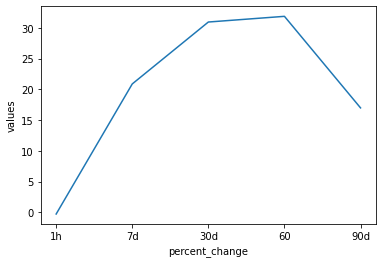

In [11]:
df7 = df5[['name', 'percent_change', 'values']]
df7 = df7.query("name == 'Bitcoin'")
sns.lineplot(x='percent_change', y='values', data=df7)

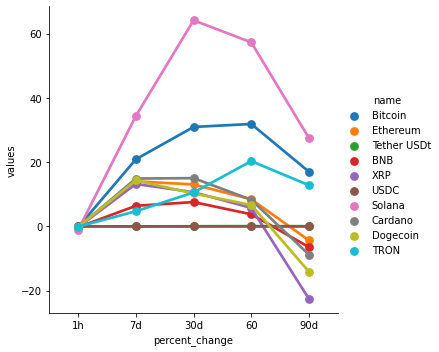

In [12]:
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')


In [13]:
# Showing only Bitcoin data
df6 = df[['name', 'quote.USD.price', 'timestamp']]
df6 = df6.query("name == 'Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,34013.02070,2023-10-25 02:40:04.544225
10,Bitcoin,34013.02070,2023-10-25 02:40:07.117661
20,Bitcoin,34013.02070,2023-10-25 02:40:09.309839
30,Bitcoin,34013.02070,2023-10-25 02:40:11.479631
40,Bitcoin,33804.24939,2023-10-25 07:50:11.691034
50,Bitcoin,33827.42979,2023-10-25 07:53:50.401702
60,Bitcoin,34155.00272,2023-10-25 09:53:50.621925
70,Bitcoin,34198.87303,2023-10-25 11:53:50.780863
80,Bitcoin,34374.92619,2023-10-25 13:53:51.014557
90,Bitcoin,34953.72509,2023-10-25 15:53:51.153187


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

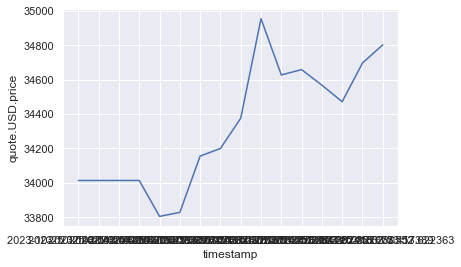

In [14]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df6)